In [3]:
import pickle
import os
import pyblp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# ディレクトリのパス
directory_path = "./results/"

# ディレクトリ内のファイルをリストとして取得
file_list = os.listdir(directory_path)

# ファイルリストを表示
for i,file in enumerate(file_list):
    print(i,file)


0 MNL_len3_2023-09-05_21-06-56.pkl
1 MNL_len3_2023-09-13_19-15-05.pkl
2 MNL_len4_2023-09-05_21-04-58.pkl
3 NL_len3_2023-10-02_21-40-47_00.pkl
4 NL_len3_2023-10-02_21-43-19_01.pkl
5 NL_len3_2023-10-02_21-44-38_10.pkl
6 NL_len3_2023-10-02_21-45-30_11.pkl
7 NL_len3_2023-11-22_03-37-50_00.pkl
8 RCL_len3_2023-09-05_23-34-50.pkl
9 RCL_len3_2023-09-07_10-26-25.pkl
10 RCL_len3_2023-09-14_01-27-16.pkl
11 RCL_len3_2023-09-15_20-29-44.pkl
12 RCL_len4_2023-09-05_21-02-48.pkl


In [4]:
# file_name=file_list[6]
# with open(f"./results/{file_name}", "rb") as f:
#     result = pickle.load(f)
file_index=[7]
results=[]
for i in file_index:
    with open(f"./results/{file_list[i]}", "rb") as f:
        results.append(pickle.load(f))


In [5]:
for res in results:
    print(np.mean(res.delta))

-5.922542147403463


In [6]:
results[0]

Problem Results Summary:
GMM     Objective      Projected       Reduced     Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Gradient Norm     Hessian     Shares   Condition Number  Condition Number 
----  -------------  -------------  -------------  -------  ----------------  -----------------
 2    +1.706481E+02  +3.692564E-08  +7.548881E+02     0      +1.923798E+04      +4.004498E+09  

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:09       Yes          2             8     

Rho Estimates (Robust SEs in Parentheses):
  All Groups   
---------------
 +4.784758E-01 
(+4.935661E-02)

Beta Estimates (Robust SEs in Parentheses):
    prices         in_hospital         oral            generic            otc           long_term      Pharmacopoeia 
---------------  ---------------  ---------------  ---------------  ---------------  -----------

In [7]:
logit_results=results[0]
elasticities = logit_results.compute_elasticities()
(logit_results.problem.products["firm_ids"]=="self").shape
self_m=np.array(pd.DataFrame(elasticities).loc[logit_results.problem.products["firm_ids"]=="self"].mean(axis=1))
nonself_m=np.array(pd.DataFrame(elasticities).loc[logit_results.problem.products["firm_ids"]=="nonself"].mean(axis=1))
other_m = np.array(pd.DataFrame(elasticities).loc[~np.isin(logit_results.problem.products["firm_ids"], ["self", "nonself"])].mean(axis=1))
# len(self_m),len(nonself_m),len(other_m) 
# np.mean(self_m),np.mean(nonself_m),np.mean(other_m)
# np.std(self_m),np.std(nonself_m),np.std(other_m)

Computing elasticities with respect to prices ...
Finished after 00:00:00.



(0.00022203724491606244, 0.0004970533001789853, 0.007509073991519506)

In [67]:
logit_results=results[0]
elasticities = logit_results.compute_elasticities()
(logit_results.problem.products["firm_ids"]=="self").shape
self_m=np.array(pd.DataFrame(elasticities).loc[logit_results.problem.products["firm_ids"]=="self"].values.flatten())
nonself_m=np.array(pd.DataFrame(elasticities).loc[logit_results.problem.products["firm_ids"]=="nonself"].values.flatten())
other_m = np.array(pd.DataFrame(elasticities).loc[~np.isin(logit_results.problem.products["firm_ids"], ["self", "nonself"])].values.flatten())
# only positive values
self_m=self_m[self_m>0]
nonself_m=nonself_m[nonself_m>0]
other_m=other_m[other_m>0]


Computing elasticities with respect to prices ...
Finished after 00:00:00.



In [68]:
sum(other_m<0),sum(other_m>0),sum(self_m<0),sum(self_m>0),sum(nonself_m<0),sum(nonself_m>0)

(0, 4588815, 0, 15791, 0, 16568)

In [96]:
np.std(self_m),np.std(nonself_m),np.std(other_m),np.mean(self_m),np.mean(nonself_m),np.mean(other_m)

(6.629369696564325e-05,
 6.311264918934013e-05,
 0.002520903806479662,
 1.459632735808747e-05,
 1.5857725353930637e-05,
 0.00023303265118003474)

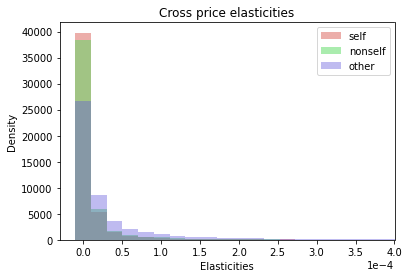

In [97]:
# ビンの範囲を指定
bins = np.linspace(-1e-3, 1e-3, 100)

import seaborn as sns

# カラーパレットを設定
colors = sns.color_palette("hls", 3)

# elasticities histogram
plt.hist(self_m, bins=bins, density=True, alpha=0.5, color=colors[0])
plt.hist(nonself_m, bins=bins, density=True, alpha=0.5, color=colors[1])
plt.hist(other_m, bins=bins, density=True, alpha=0.4, color=colors[2])
plt.legend(["self","nonself","other"])
plt.xlim(-.3e-4,.4e-3)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title("Cross price elasticities")
plt.xlabel("Elasticities")
plt.ylabel("Density")
plt.show()

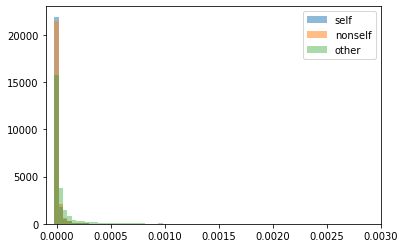

In [76]:
# ビンの範囲を指定
bins = np.linspace(-1e-2, 1e-2, 500)

# elasticities histogram
plt.hist(self_m, bins=bins, density=True, alpha=0.5)
plt.hist(nonself_m, bins=bins, density=True, alpha=0.5)
plt.hist(other_m, bins=bins, density=True, alpha=0.4)
plt.legend(["self","nonself","other"])
plt.xlim(-1e-4,3e-3)
plt.show()

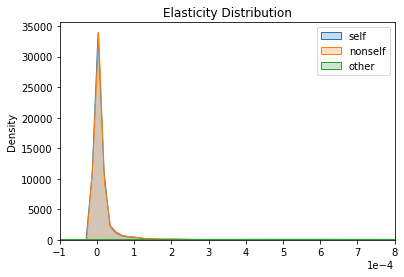

In [88]:
# elasticity distribution
import seaborn as sns
def x_weights(data):
    x_weights = np.ones_like(data) / len(data)
    return x_weights
sns.kdeplot(x=self_m, label='self',fill=True)
sns.kdeplot(x=nonself_m, label='nonself',fill=True)
sns.kdeplot(x=other_m, label='other',fill=True)
plt.title('Elasticity Distribution')
plt.legend()
plt.xlim(-.1e-3,.8e-3)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

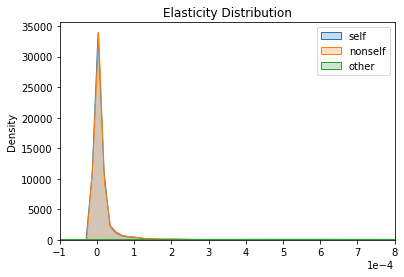

In [85]:
# elasticity distribution
import seaborn as sns
def x_weights(data):
    x_weights = np.ones_like(data) / len(data)
    return x_weights
sns.kdeplot(x=self_m, label='self',fill=True,weights=x_weights(self_m))
sns.kdeplot(x=nonself_m, label='nonself',fill=True,weights=x_weights(nonself_m))
sns.kdeplot(x=other_m, label='other',fill=True,weights=x_weights(other_m))
plt.title('Elasticity Distribution')
plt.legend()
plt.xlim(-.1e-3,.8e-3)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

In [72]:
import sys
sys.exit()
opt_results=[]
for res in results:
    optimization=pyblp.Optimization('bfgs')
    instruments_results=res.compute_optimal_instruments().to_problem().solve(rho=0.7,optimization=optimization)
    opt_results.append(instruments_results)
    # print(np.mean(instruments_results.delta))

SystemExit: 

c:\Users\hakos\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
for res in opt_results:
    print(np.mean(res.delta))

3.998081497643444
13.706269236956667
36.5894767483755
-61.145998577438874


In [ ]:
# problem and rc_types
result.problem, result.problem.rc_types

(Dimensions:
  T     N      I     K1    K2    MD    ED 
 ---  -----  -----  ----  ----  ----  ----
 200  25798  40000   4     2     6     2  
 
 Formulations:
        Column Indices:            0        1          2          3   
 -----------------------------  -------  -------  -----------  -------
  X1: Linear Characteristics    prices    oral    in_hospital  generic
 X2: Nonlinear Characteristics  -prices  generic                      
 =====================================================================,
 ['log', 'linear'])

In [ ]:
# constraints
result.sigma_bounds,result.pi_bounds

((array([[  0.,   0.],
         [  0., -inf]]),
  array([[inf,  0.],
         [ 0., inf]])),
 (array([], shape=(2, 0), dtype=float64),
  array([], shape=(2, 0), dtype=float64)))

In [ ]:
# result
result

Problem Results Summary:
GMM     Objective      Projected    Reduced Hessian  Reduced Hessian  Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Gradient Norm  Min Eigenvalue   Max Eigenvalue   Shares   Condition Number  Condition Number 
----  -------------  -------------  ---------------  ---------------  -------  ----------------  -----------------
 2    +5.133956E-01  +8.633399E-01   -2.678789E+07    +8.260620E+07      0      +3.757242E+08      +2.720855E+08  

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective   Fixed Point  Contraction
   Time      Converged   Iterations   Evaluations  Iterations   Evaluations
-----------  ---------  ------------  -----------  -----------  -----------
 01:38:56       Yes          3            12         2811523      8438415  

Nonlinear Coefficient Estimates (Robust SEs in Parentheses):
Types:  |  Sigma:       -prices          generic    
------  |  -------  ---------------  ---------------
 Log    |  -prices 

In [ ]:
# time in minutes
result.cumulative_total_time/60

98.9275143901507

In [ ]:

product_data=pd.DataFrame(pyblp.data_to_dict(result.problem.products))

Computing elasticities with respect to prices ...
Finished after 00:00:00.



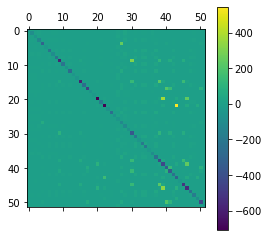

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
elasticities = result.compute_elasticities()
single_market = product_data['market_ids'] == '131-2014.0'
K=sum(single_market)
plt.colorbar(plt.matshow(elasticities[single_market][:,:K]))
# plt.colorbar(plt.matshow(elasticities))

Computing diversion ratios with respect to prices ...

Encountered a numerical error when computing a post-estimation output. Errors encountered: divide by zero.

Finished after 00:00:00.



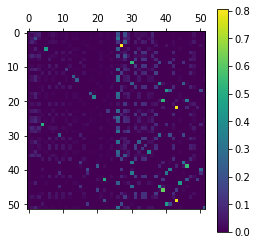

In [ ]:
diversions = result.compute_diversion_ratios()
plt.colorbar(plt.matshow(diversions[single_market][:,:K]))